#                                   TUGAS 2 PROBALITAS & STATISTIKA

* Nama  : Ananta yusra putra akmal 
* NIM   : 209106024
* Kelas : Informatika A 2021

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from matplotlib import style
from matplotlib.pyplot import grid

df = pd.read_csv("StudentsPerformance.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### a. Tabel Distribusi Frekuensi dan Histogram

In [69]:
ranges = np.arange(0, 110, 10)
tanda = np.vectorize(lambda x: f"{x}-{x + 10}")(np.arange(0, 100, 10))

reading_score_ttl = df.groupby(pd.cut(df["reading score"],
bins=ranges, labels=tanda))["reading score"].count().to_list()

reading_score = pd.DataFrame({ 'Interval': tanda, 
'Total': reading_score_ttl })
print(reading_score_ttl)

writing_score_ttl = df.groupby(pd.cut(df["writing score"], 
bins=ranges, labels=tanda))["writing score"].count().to_list()

writing_score = pd.DataFrame({ 'Interval': tanda, 
'Total': writing_score_ttl })
print(writing_score)


[0, 1, 7, 19, 70, 178, 238, 252, 173, 62]
  Interval  Total
0     0-10      1
1    10-20      2
2    20-30      7
3    30-40     25
4    40-50     89
5    50-60    177
6    60-70    243
7    70-80    248
8    80-90    140
9   90-100     68


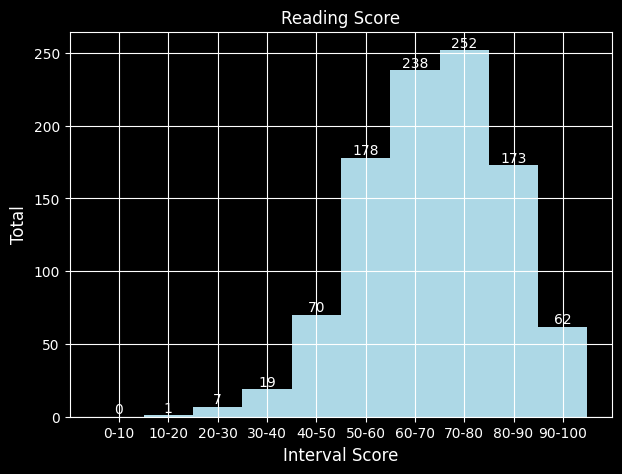

In [79]:
fig, (an1) = plt.subplots(1, figsize=(7,5))
reading_score = an1.bar(tanda, reading_score_ttl, color='lightblue', width=1.0)

an1.grid()
an1.set_title('Reading Score')
an1.set_xlabel('Interval Score', fontsize=12)
an1.set_ylabel('Total', fontsize=12)
an1.bar_label(reading_score)
plt.style.use('dark_background')


plt.show()

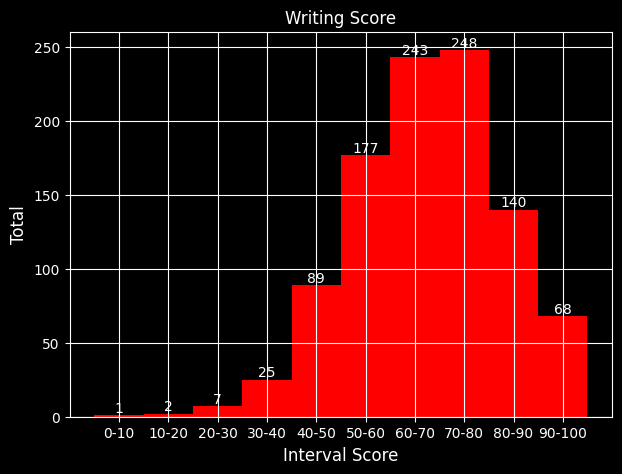

In [81]:
fig, (an2) = plt.subplots(1, figsize=(7,5))
writing_score_bar =  an2.bar(tanda, writing_score_ttl, color='red', width=1.0)

an2.grid()
an2.set_title('Writing Score')
an2.set_xlabel('Interval Score', fontsize=12)
an2.set_ylabel('Total', fontsize=12)
an2.bar_label(writing_score_bar)
plt.style.use('dark_background')

plt.show()

#### b. Tentukan Nilai Tendensi Central: Rata-rata, Median, Modus, Min dan Max

In [72]:
Tendensi_RS = PrettyTable(["Tendensi Central Reading Score", "Hasil"])
Tendensi_RS.align = "l"
Tendensi_RS.add_row([
    "Rata-rata", 
    df["reading score"].mean()
    ])
Tendensi_RS.add_row([
    "Median", 
    df["reading score"].median()
    ])
Tendensi_RS.add_row([
    "Modus", 
    df["reading score"].mode()[0]
    ])
Tendensi_RS.add_row([
    "Min", 
    df["reading score"].min()
    ])
Tendensi_RS.add_row([
    "Max", 
    df["reading score"].max()
    ])
print(Tendensi_RS)

Tendensi_WS = PrettyTable(["Tendensi Central Writing Score", "Hasil"])
Tendensi_WS.align = "l"

Tendensi_WS.add_row([
    "Rata-rata", 
    df["writing score"].mean()
    ])
Tendensi_WS.add_row([
    "Median", 
    df["writing score"].median()
    ])
Tendensi_WS.add_row([
    "Modus", 
    df["writing score"].mode()[0]
    ])
Tendensi_WS.add_row([
    "Min", 
    df["writing score"].min()
    ])
Tendensi_WS.add_row([
    "Max", 
    df["writing score"].max()
    ])
print(Tendensi_WS)

+--------------------------------+--------+
| Tendensi Central Reading Score | Hasil  |
+--------------------------------+--------+
| Rata-rata                      | 69.169 |
| Median                         | 70.0   |
| Modus                          | 72     |
| Min                            | 17     |
| Max                            | 100    |
+--------------------------------+--------+
+--------------------------------+--------+
| Tendensi Central Writing Score | Hasil  |
+--------------------------------+--------+
| Rata-rata                      | 68.054 |
| Median                         | 69.0   |
| Modus                          | 74     |
| Min                            | 10     |
| Max                            | 100    |
+--------------------------------+--------+


#### c. Tentukan Nilai Variasi: Jangkauan Range, Kisaran Interkuartil, Varians, Standar Deviasi

In [73]:
rang = 100 - 17
Q = (np.percentile(df["reading score"], 75) + np.percentile(df["reading score"], 25)) / 2
var = df["reading score"].var()
stdn = df["reading score"].std()

table3 = PrettyTable(["Data", "Hasil"])
table3.align = "l"
table3.add_row(["Jangkaun Range", rang])
table3.add_row(["Kisaran Kuartil", Q])
table3.add_row(["Varians", var])
table3.add_row(["Standard Deviasi", stdn])

print("Reading Sscore")
print(table3)

Reading Sscore
+------------------+--------------------+
| Data             | Hasil              |
+------------------+--------------------+
| Jangkaun Range   | 83                 |
| Kisaran Kuartil  | 69.0               |
| Varians          | 213.16560460460462 |
| Standard Deviasi | 14.600191937252216 |
+------------------+--------------------+


In [83]:

VT2 = PrettyTable(["Nilai Variasi", "Hasil"])
VT2.align = "l"
Range_WS = ((df["writing score"].max()) - (df["writing score"].min()))
Q1_WS  = np.quantile(df['writing score'],.25)
Q3_WS = np.quantile(df['writing score'],.75)
Interquartil_WS = (Q3_WS - Q1_WS)/2
Varian_WS = df['writing score'].var()
Standar_DeviasiWS = df['writing score'].std()

VT2.add_row(["Jangkauan Range", Range_WS])
VT2.add_row(["Kisaran Interkuartil", Interquartil_WS])
VT2.add_row(["Varians", Varian_WS])
VT2.add_row(["Standar Deviasi", Standar_DeviasiWS])
print("Writing Sscore")
print(VT2)

Writing Sscore
+----------------------+-------------------+
| Nilai Variasi        | Hasil             |
+----------------------+-------------------+
| Jangkauan Range      | 90                |
| Kisaran Interkuartil | 10.625            |
| Varians              | 230.907991991992  |
| Standar Deviasi      | 15.19565701086965 |
+----------------------+-------------------+


#### d.  Buat Grafik data Variabel reading_score dan writing_score: Histogram, BOX PLOT, dan Tentukan Nilai Skewness dan Kurtosis

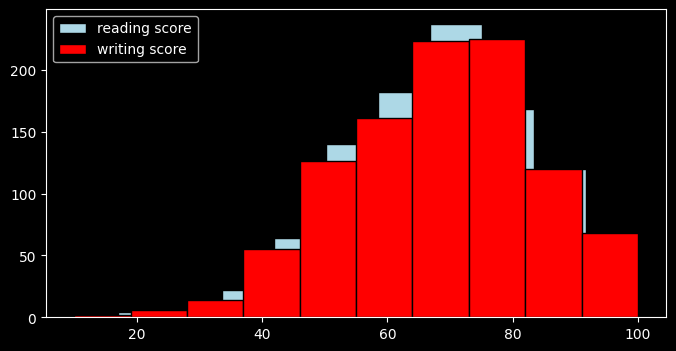

In [75]:
fig, (hist) = plt.subplots(1, figsize=(8,4))
hist.hist(
    df['reading score'], 
    stacked=True, 
    edgecolor="black",
    color="lightblue", 
    label="reading score")

hist.hist(
    df['writing score'], 
    stacked=True,
    edgecolor="black",
    color="red", 
    label="writing score")
hist.legend()


plt.show()

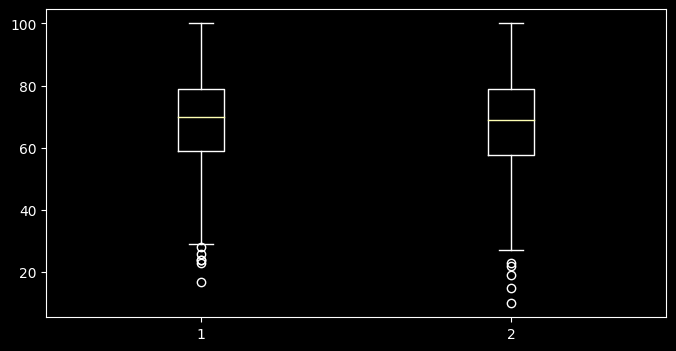

In [76]:
fig, (boxplot) = plt.subplots(1, figsize=(8,4))
boxplot.boxplot([df['reading score'], df['writing score']])

plt.show()

In [77]:
skew = df["reading score"].astype(float).skew()
kurt =  df["reading score"].astype(float).kurt()

table5 = PrettyTable(["Data", "Hasil"])
table5.align = "l"
table5.add_row(["Skewness", skew])
table5.add_row(["Kurtosis", kurt])

print("Reading Score")
print(table5)

Reading Score
+----------+----------------------+
| Data     | Hasil                |
+----------+----------------------+
| Skewness | -0.25910451810923063 |
| Kurtosis | -0.0682654585647704  |
+----------+----------------------+


In [85]:
skew2 = df["writing score"].astype(float).skew()
kurt2 =  df["writing score"].astype(float).kurt()

table6 = PrettyTable(["Data", "Hasil"])
table6.align = "l"
table6.add_row(["Skewness", skew2])
table6.add_row(["Kurtosis", kurt2])

print("Writing Score")
print(table6)

Writing Score
+----------+----------------------+
| Data     | Hasil                |
+----------+----------------------+
| Skewness | -0.28944397150761897 |
| Kurtosis | -0.03336461500693577 |
+----------+----------------------+


#### e. Buat scater plot antara writing_score (dependent variable-Y) versus reading_score (independent variable-X)

c:\Users\TUF-GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


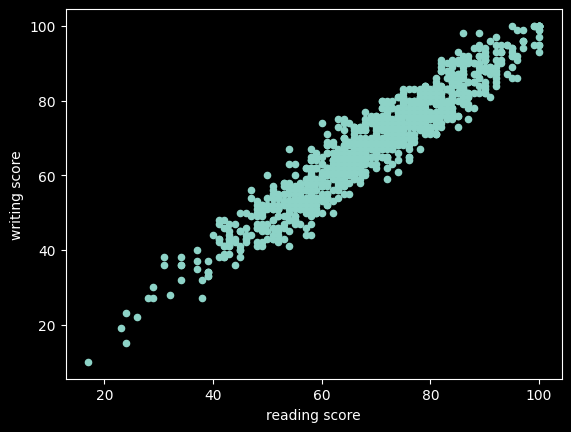

In [78]:
fig, ax = plt.subplots()

df_group = df.groupby('reading score')
colors = {"reading score":'red'}

for name, group in df_group:
    group.plot(ax=ax, kind='scatter', x='reading score', y='writing score',)

plt.show()